In [47]:
from numpy import *
import matplotlib.pyplot as plt
plt.style.use ("seaborn-poster")
%matplotlib inline

## Interpolación de Newton o Diferencias Dividas

Es un método de interpolación polinómica.<br>
Este método es útil para situaciones que requieran un número bajo de puntos para interpolar, ya que a medida que crece el número de puntos, también lo hace el grado del polinomio.

### Definición de pendiente de orden n
El primer paso para hallar la fórmula de la interpolación es definir la pendiente de orden $n$  de manera recursiva:

- $f_0(x_i)$ : término i-ésimo de la secuencia

- $f_1(x_0, x_1) = \frac{f_0(x_1) - f_0(x_0)}{x_1 - x_0}$

- $f_2(x_0, x_1, x_2) = \frac{f_1(x_1,x_2) - f_1(x_0,x_1)}{x_2 - x_0}$ 

En general: <br>
- $f_i(x_0, x_1, ..., x_{i-1}, x_i) = \frac{f_{i-1}(x_1,...,x_{i-1},x_i) - f_{i-1}(x_0,x_1,...,x_{i-1})}{x_i - x_0}$

### Definición del polinomio
Una vez conocemos la pendiente, ya es posible definir el polinomio de grado $n$ de manera también recursiva:

- $p_0(x) = f_0(x_0) = x_0$. Se define así ya que este es el único valor que se ajusta a la secuencia original para el primer término.

- $p_1(x) = p_0(x) + f_1(x_0,x_1) * (x - x_0)$
- $p_2(x) = p_1(x) + f_2(x_0, x_1, x_2) * (x - x_0) * (x - x_1)$

En general<br>

- $p_i(x) = p_{i-1}(v) + f_i(x_0,x_1,...,x_{i-1},x_i) \prod_{j = 0}^{i - 1}(x - x_j)$

## Implementación

```def diferencias_divididas(x, y):``` función para calcular la tabla de las diferencias divididas

Entrada:
- ```x``` = arreglo que contiene los coeficientes de x
- ```y``` = arreglo que contiene los valores de y para cada x

Salida:

- ```coef``` = tabla de diferencias divididas

In [48]:
def diferencias_divididas(x, y):

    n = y.shape[0]
    coef = zeros((n,n))
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] =(coef[i+1][j-1] - coef[i][j-1]) /(x[i+j] - x[i])
    
    return coef

```def newton_poly(coef, x_data, x_0)``` función para evaluar el polinomio de Newton en $x_0$

Entrada:
- ```coef``` = tabla de las diferencias divididas
- ```x_data``` = valores de x
- ```x_0``` = valor en el que evaluar el polinomio

In [49]:
def newton_poly(coef, x_data, x0):

    n = len(x_data) - 1
    p = coef[n]
    
    for i in range(1, n + 1):
        p = coef[n-i] +(x0 - x_data[n-i]) * p
    
    return p

## Inserción de datos:

In [50]:
x = array([2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5])
y = array([3, 14, 34, 64, 107, 165, 240, 336, 451, 591])

#numero de diferencia divididas a mostrar
n = 5

## Salida:

x      	 f(x)   	 dif 1      	 dif 2      	 dif 3      	 dif 4      	 dif 5      	 
2.00000	 3.00000	 3.00000	 22.00000	 18.00000	 1.33333	 1.33333	 

2.50000	 14.00000	 14.00000	 40.00000	 20.00000	 4.00000	 -0.66667	 

3.00000	 34.00000	 34.00000	 60.00000	 26.00000	 2.66667	 0.00000	 

3.50000	 64.00000	 64.00000	 86.00000	 30.00000	 2.66667	 1.33333	 

4.00000	 107.00000	 107.00000	 116.00000	 34.00000	 5.33333	 -4.00000	 

4.50000	 165.00000	 165.00000	 150.00000	 42.00000	 -2.66667	 5.33333	 

5.00000	 240.00000	 240.00000	 192.00000	 38.00000	 8.00000	 0.00000	 

5.50000	 336.00000	 336.00000	 230.00000	 50.00000	 0.00000	 0.00000	 

6.00000	 451.00000	 451.00000	 280.00000	 0.00000	 0.00000	 0.00000	 

6.50000	 591.00000	 591.00000	 0.00000	 0.00000	 0.00000	 0.00000	 



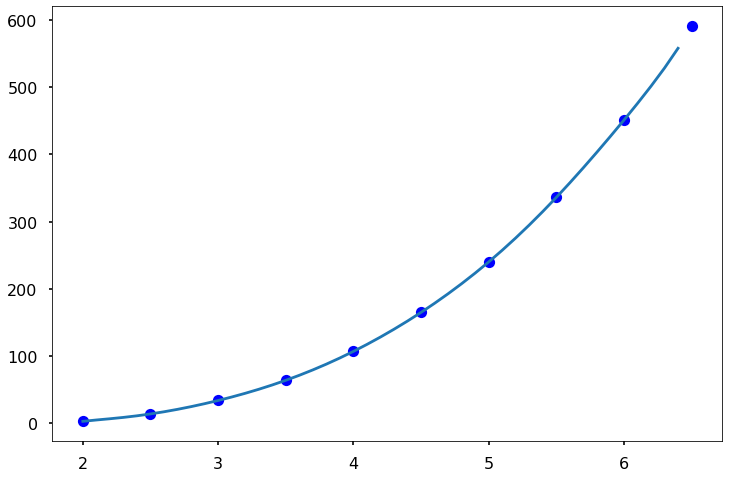

In [51]:
a_s = diferencias_divididas(x, y)

#encabezado
print ("{:<7}\t {:<7}\t ".format("x", "f(x)"), end = '')
for i in range(n):
    print("dif {:<7}\t ".format(i+1), end = '')
print()

for i in range(a_s.shape[0]):
    print("{:.5f}\t {:.5f}\t ".format(x[i],y[i]), end = '')
    for j in range(n):
        print("{:.5f}\t ".format(a_s[i][j]), end = '')
    print("\n")

x0 = arange(x[0], x[len(x)-1], .1)
y0 = newton_poly(a_s[0,:], x, x0)

plt.figure( figsize =(12,8) )
plt.plot(x ,y, "bo")
plt.plot(x0,y0)